# Notebook 4 - Modelling and Conclusions

##### Alessandro DeChellis
##### Data Set: nhl_data_modelling.csv

## Introduction

In this notebook, we will be using our data from the previous notebook to do our modelling. The goal of this notebook is to find an accurate way to predict regular season and playoff success. They are defined as the following:

<b>Regular Season Success</b>: Making it to the playoffs (R1 = 1). There are 16 teams that make playoffs each year 

<b>Playoff Success</b>: Making it to the second round of the playoffs (R2 = 1). There are 8 teams that reach the second round each year

The analysis will explore how we can predict a team's success based on the distribution of their salary cap. We will also look to explore what salaries are most important and influential on a team's success.

<b>** Note: This is the last notebook in a 4 part series **</b>

In [252]:
## Import our packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import re
from math import exp
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

#### Read in CSV

Our first step is to read in the csv from the previous notebook. We then check to see that it is the the data we expect. 

In [253]:
# Read in the csv

nhl_data = pd.read_csv('data/nhl_data_modelling.csv')

In [254]:
# check our csv 

nhl_data.head()

,team,year,R1,R2,R3,R4,WC,1,2,3,...,16,17,18,19,20,salary cap,Q1,Q2,Q3,Q4
0,ARI,2012,1,1,1,0,0,0.081649,0.077760,0.070762,...,0.019440,0.017107,0.016330,0.013997,0.013997,64300000,0.335148,0.195568,0.125583,0.080871
1,ARI,2013,0,0,0,0,0,0.082426,0.081649,0.062208,...,0.017107,0.013997,0.013997,0.013271,0.013227,64300000,0.339036,0.215008,0.124028,0.071599
2,ARI,2014,0,0,0,0,0,0.088129,0.085537,0.085537,...,0.017885,0.013608,0.013530,0.013427,0.013271,64300000,0.423276,0.285381,0.186042,0.071721
3,ARI,2015,0,0,0,0,0,0.082126,0.079710,0.076812,...,0.013406,0.012959,0.012681,0.012512,0.012367,69000000,0.384300,0.259420,0.102959,0.063925
4,ARI,2016,0,0,0,0,0,0.079365,0.077031,0.074230,...,0.012955,0.012955,0.012955,0.012255,0.012255,71400000,0.335668,0.228291,0.100000,0.063375


### Model Selection

For this analysis, we will be using a logistic regression and a decision tree classifier. 

A logistic regression will allow us to find the salaries of players that have the most impact on a team's succes and implement those findings into an NHL organization.

It is our hope that the decision tree classifier will give us a more accurate prediction of which teams will or won't be successful.

## Model 1:  Regular Season Success Logistic Regression

The first step in our modelling is to run a logistic regression to figure out which salary variables most affect a team making the playoffs (R1 = 1). We will first set the X and y variables as the features and target variable, respectively.

In [365]:
# columns to drop
drops = ['R1','R2', 'R3', 'R4', 'WC', 'Q1', 'Q2', 'Q3', 'Q4', 'team', 'year', 'salary cap']

#Set X and y variables

X = nhl_data.drop(columns=drops)
y = nhl_data['R1']

Check to see that the feature and target are the shapes that we want. 

In [366]:
#Check to see that this worked and we have an equal amount of rows

print(X.shape)
print(y.shape)

(304, 20)
(304,)


### Train/Test/Validation Split

The next step is to split the variables into a train set and test set in order to find our accuracy. We have chosen a 60/40 split for remainder and test sets, respectively. We will use an 80/20 split for the training and validation sets. The validation set will be used to optimize our parameters.

In [420]:
from sklearn.model_selection import train_test_split

# Split the data
X_remainder1, X_test1, y_remainder1, y_test1 = \
    train_test_split(X, y, test_size = 0.4,
                     random_state=1)

In [421]:
# Split the remainder into train and validation sets

X_train1, X_validation1, y_train1, y_validation1 = \
    train_test_split(X_remainder1, y_remainder1, test_size = 0.3,
                     random_state=1)

### Optimization 

In order to optimize the model, the c value will be optimized using the validation set. There will be a loop through 17 different multiples of 10 to find the value that will give us the best results

In [422]:
# set the empty lists
validation_scores = []
train_scores = []

# Set the c values to check for
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# Loop through all the values
for c in C_range:
    season_logreg = LogisticRegression(C = c,random_state=1)
    season_logreg.fit(X_train1,y_train1)
    
    # train on traning set
    train_scores.append(season_logreg.score(X_train1,y_train1))
    # score on validation set
    validation_scores.append(season_logreg.score(X_validation1,y_validation1))
    


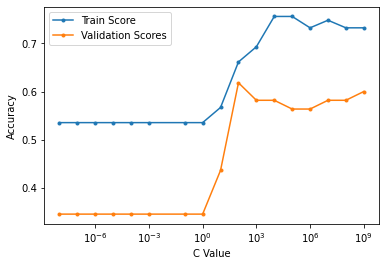

In [423]:
# Plot the values above

plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

From this plot, we can see that our optimal C value is at 100. This is where our train and validation scores are the closest.

### Running the Model

We can now train and test the model to see what our accuracy scores are for the test set.

In [424]:
# Ignore Warnings
warnings.filterwarnings("ignore")

# Fitting the model
season_reg = LogisticRegression(C = 100)
season_reg.fit(X_train1, y_train1)

# Scoring
print(f"Train score: {season_reg.score(X_train1, y_train1)}") 
print(f"Test score: {season_reg.score(X_test1, y_test1)}") 

Train score: 0.6614173228346457
Test score: 0.5983606557377049


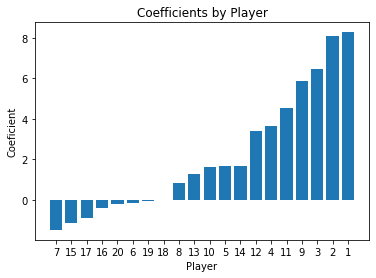

In [425]:
# Set up the player list
players = ['1', '2', '3', '4', '5','6', '7', '8','9','10','11','12','13','14','15','16','17','18','19','20']

# Create a dataframe with the coefficients
season_coef = pd.DataFrame({'player': players, 'coeficient': season_reg.coef_[0]})

#Sort by coefficient value
season_coef = season_coef.sort_values(by=['coeficient'], ascending = True)

# Plot the coefficients
plt.plot()
plt.bar(season_coef['player'], season_coef['coeficient'])
plt.title('Coefficients by Player')
plt.xlabel('Player')
plt.ylabel('Coeficient')
plt.show()


##### Coefficients

From the above graph, we can see that players in the top ten of the salaries tend to have a higher effect on a team making the playoffs. What's interesting is that the ninth highest paid player has the fourth biggest coefficient, which goes along with our theory that team depth has a large affect on the team's success.

### Accuracy

As noted above, the accuracy on the test score is 59%. This is not ideal, but we can look more into this by creating a confustion matrix and  to identify where the issues lie. 

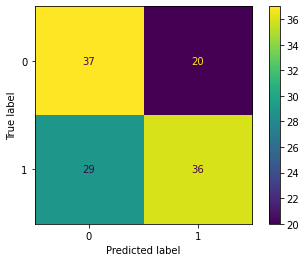

In [426]:
## plot the confusion matrix
plot_confusion_matrix(season_reg, X_test1, y_test1);

In [443]:
from sklearn.metrics import f1_score
## find the report 
y_pred1 = season_reg.predict(X_test1)
report_initial = classification_report(y_test1, y_pred1)
print(report_initial)


              precision    recall  f1-score   support

           0       0.56      0.65      0.60        57
           1       0.64      0.55      0.60        65

    accuracy                           0.60       122
   macro avg       0.60      0.60      0.60       122
weighted avg       0.60      0.60      0.60       122



From what we can see, there are quite a few false positives and false negatives for this model. Given that we want to predict positives, we look at the recall score. Our recal score on this model is 0.55, meaning the model is only predicting 55% of actual positives to be positive, not a great score. 

## Model 2: First Round Playoff Success Logistic Regression

The first step in our modelling is to run a logistic regression to figure out which salary variables most affect a team winning a playoff round (R2 = 1). We will first set the X and y variables as the features and target variable, respectively.

In [428]:
# columns to drop
drops = ['R1','R2', 'R3', 'R4', 'WC', 'Q1', 'Q2', 'Q3', 'Q4', 'team', 'year', 'salary cap']

#Set X and y variables

X1 = nhl_data.drop(columns=drops)
y1 = nhl_data['R2']

In [429]:
#Check to see that this worked and we have an equal amount of rows

print(X1.shape)
print(y1.shape)

(304, 20)
(304,)


### Train/Test/Validation Split

Similar to above, we will use a 40% test set, and from the remainder, a 20% validation set. 

In [431]:
# Split the data
X_remainder2, X_test2, y_remainder2, y_test2 = \
    train_test_split(X1, y1, test_size = 0.4,
                     random_state=1)

In [432]:
# Split the remainder
X_train2, X_validation2, y_train2, y_validation2 = \
    train_test_split(X_remainder2, y_remainder2, test_size = 0.3,
                     random_state=1)

### Optimization

The same method as above was used to find the optimal C value for our model

In [433]:
# Set up the blank lists
validation_scores2 = []
train_scores2 = []
#Set the range
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Run the loop
for c in C_range:
    playoff_logreg = LogisticRegression(C = c,random_state=1)
    playoff_logreg.fit(X_train2,y_train2)
    
    # train on traning set
    train_scores2.append(playoff_logreg.score(X_train2,y_train2))
    # score on validation set
    validation_scores2.append(playoff_logreg.score(X_validation2,y_validation2))
    

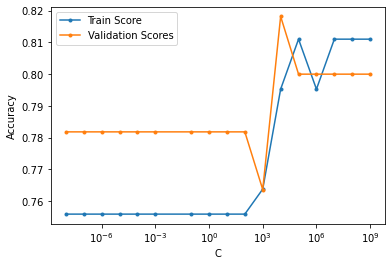

In [434]:
#plot the values
plt.figure()
plt.plot(C_range, train_scores2,label="Train Score",marker='.')
plt.plot(C_range, validation_scores2,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

We will use a C value of 100. As it is one of the scores with the lowest distance between validation and train scores. 

### Running the Model

We again train and test our model for accuracy and to find the coeffients.

In [439]:
# Ignore Warnings
warnings.filterwarnings("ignore")

# Fitting the model
playoff_reg = LogisticRegression(C = 1000)
playoff_reg.fit(X_train2, y_train2)

# Scoring
print(f"Train score: {playoff_reg.score(X_train2, y_train2)}") 
print(f"Test score: {playoff_reg.score(X_test2, y_test2)}") 

Train score: 0.7637795275590551
Test score: 0.7131147540983607


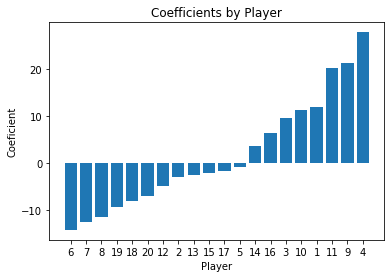

In [440]:
# Set up the list of players
players = ['1', '2', '3', '4', '5','6', '7', '8','9','10','11','12','13','14','15','16','17','18','19','20']
# create a dataframe with the coefficients
playoff_coef = pd.DataFrame({'player': players, 'coeficient': playoff_reg.coef_[0]})
# Sort by coefficient values
playoff_coef = playoff_coef.sort_values(by=['coeficient'], ascending = True)
#Plot the Values
plt.plot()
plt.bar(playoff_coef['player'], playoff_coef['coeficient'])
plt.title('Coefficients by Player')
plt.xlabel('Player')
plt.ylabel('Coeficient')
plt.show()


##### Coefficients

From the above coefficients, we see that players 4, 9 and 11 have the highest positive coefficients for a positive score on our test (first round win). This is very applicable for general managers to show that second and third line players (6-15th in salaries) tend to make the most impact in the playoffs. 

Intuitively, we know that first line players tend to get held to low production in the playoffs, justified by this analysis thus far. 

### Accuracy

The accuracy on the test score is 71.3%. We will dive into this more below.

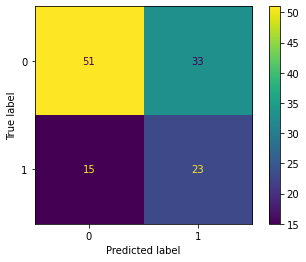

In [442]:
# Plot the confusion matrix
plot_confusion_matrix(season_reg, X_test2, y_test2);

In [444]:
# Set y_pred2
y_pred2 = season_reg.predict(X_test2)
# Run and print the report
report_initial2 = classification_report(y_test2, y_pred2)
print(report_initial2)


              precision    recall  f1-score   support

           0       0.77      0.61      0.68        84
           1       0.41      0.61      0.49        38

    accuracy                           0.61       122
   macro avg       0.59      0.61      0.58       122
weighted avg       0.66      0.61      0.62       122



In this model, we have higher accuracy (71.3%) and a higher recall score (61%). This is a much better model than the one done for regular season success. This leads us to believe that building a team being more conscious of salary distribution can lead to higher success in the playoffs. 

## Model 3: Decision Tree for Regular Season Success

In an attempt to increase accuracy and recall on our predictor, we will run a decision tree classifier. 

In [446]:
# columns to drop
drops = ['R1','R2', 'R3', 'R4', 'WC', 'Q1', 'Q2', 'Q3', 'Q4', 'team', 'year', 'salary cap']

#Set X and y variables

X2 = nhl_data.drop(columns=drops)
y2 = nhl_data['R1']

### Train/Test/Validation Split

For this Decision Tree, I will be using a 30% test set, and from the remainder, a 20% validation set. 

In [471]:
from sklearn.model_selection import train_test_split

# Split the data
X_remainder3, X_test3, y_remainder3, y_test3 = \
    train_test_split(X2, y2, test_size = 0.3,
                     random_state=1)

In [472]:
# Split the validation set
X_train3, X_validation3, y_train3, y_validation3 = \
    train_test_split(X_remainder3, y_remainder3, test_size = 0.2,
                     random_state=1)

### Optimization

To find our optimal hyperparameters, we will be running a loop to find the optimal value for `max_depth`. This will be done similarily to above where we run a loop and plot the results. 

In [473]:
# Set up the blank lists

validation_scores2 = []
train_scores2 = []

# Run the loop

C_range = range(1,20)

for c in C_range:
    season_DT = DecisionTreeClassifier(max_depth=c)
    season_DT.fit(X_train3,y_train3)
    
    # train on traning set
    train_scores2.append(season_DT.score(X_train3,y_train3))
    # score on validation set
    validation_scores2.append(season_DT.score(X_validation3,y_validation3))

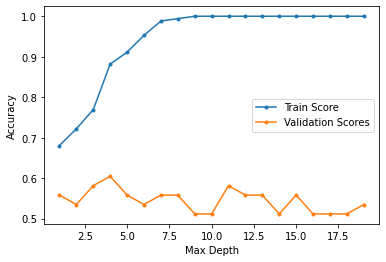

In [474]:
# Plot the values

plt.figure()
plt.plot(C_range, train_scores2,label="Train Score",marker='.')
plt.plot(C_range, validation_scores2,label="Validation Scores",marker='.')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

Looking at the plot, it occurs to me that a `max_depth` of 3 will be optimal for our model. there is a high accuracy score with a small distance between validation and train scores. 

### Running the Model

We can now run our decision tree with the optimized hyperparameters. 

In [475]:
# Instantiate and fit the model
season_DT = DecisionTreeClassifier(max_depth=3)
season_DT.fit(X_train3, y_train3)

print(f"The train classification accuracy is:  {season_DT.score(X_train3,y_train3)}")
print(f"The test classification accuracy is:  {season_DT.score(X_test3,y_test3)}")

The train classification accuracy is:  0.7692307692307693
The test classification accuracy is:  0.6630434782608695


### Accuracy

Our 66% accuracy is higher than our logistic regression for Regular Season success, we can check below if this is something we can rely on or not by looking at the recall score.

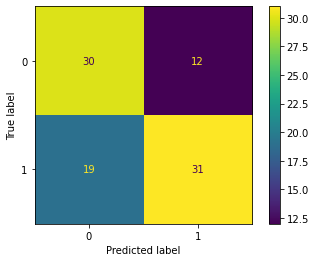

In [480]:
# Run the Confusion Matrixx
plot_confusion_matrix(season_DT, X_test3, y_test3);

In [479]:
# Define y_pred3
y_pred3 = season_DT.predict(X_test3)

In [490]:
# Get the Report
report_initial3 = classification_report(y_test3, y_pred3)
print(report_initial3)

              precision    recall  f1-score   support

           0       0.61      0.71      0.66        42
           1       0.72      0.62      0.67        50

    accuracy                           0.66        92
   macro avg       0.67      0.67      0.66        92
weighted avg       0.67      0.66      0.66        92



This model is a slightly better predictor for our regular season success of a team. A recall of 0.62 shows us that we are correctly predicting positive scores 62% of the time

## Model 4: Decision Tree for Playoff Success

To ride the improvements of our regular season decision tree, we will run the same classifier to predict playoff success. 

In [481]:
# columns to drop
drops = ['R1','R2', 'R3', 'R4', 'WC', 'Q1', 'Q2', 'Q3', 'Q4', 'team', 'year', 'salary cap']

#Set X and y variables

X3 = nhl_data.drop(columns=drops)
y3 = nhl_data['R2']

### Train/Test/Validation Split

Similar to above, we will be using a 30% test set and of the remainder, a 20% validation Set

In [482]:
# Split the data for the test set
X_remainder4, X_test4, y_remainder4, y_test4 = \
    train_test_split(X3, y3, test_size = 0.3,
                     random_state=1)

In [484]:
# Split the remainder set to get the validation set
X_train4, X_validation4, y_train4, y_validation4 = \
    train_test_split(X_remainder3, y_remainder3, test_size = 0.2,
                     random_state=1)

### Optimization

We will be using the same strategy as above to optimize for `max_depth`. 

In [485]:
# Set up the blank lists

validation_scores3 = []
train_scores3 = []

# Run the loop

C_range = range(1,20)

for c in C_range:
    playoff_DT = DecisionTreeClassifier(max_depth=c)
    playoff_DT.fit(X_train4,y_train4)
    
    # train on traning set
    train_scores3.append(playoff_DT.score(X_train4,y_train4))
    # score on validation set
    validation_scores3.append(playoff_DT.score(X_validation4,y_validation4))

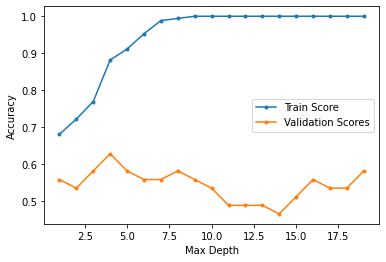

In [486]:
# Plot the values

plt.figure()
plt.plot(C_range, train_scores3,label="Train Score",marker='.')
plt.plot(C_range, validation_scores3,label="Validation Scores",marker='.')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

We will use a max_depth of 3, where the train and validation scores are the closest.

### Running the Model

We can now run the model with our optimized hyperparameters

In [488]:
# Instantiate and fit the model
playoff_DT = DecisionTreeClassifier(max_depth=3)
playoff_DT.fit(X_train4, y_train4)

print(f"The train classification accuracy is:  {playoff_DT.score(X_train4,y_train4)}")
print(f"The test classification accuracy is:  {playoff_DT.score(X_test4,y_test4)}")

The train classification accuracy is:  0.7692307692307693
The test classification accuracy is:  0.5978260869565217


### Analyze

Our accuracy on this model is lower than the logistic regression for Playoff Success, but we need to look at the confusion matrix to see if we can rely on this value.

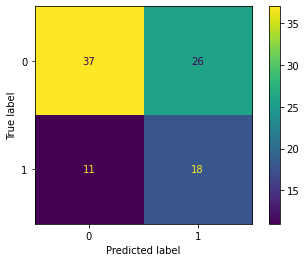

In [489]:
# Run the Confusion Matrixx
plot_confusion_matrix(playoff_DT, X_test4, y_test4);

In [492]:
# Define y_pred4
y_pred4 = playoff_DT.predict(X_test4)

In [493]:
# Get the Report
report_initial4 = classification_report(y_test4, y_pred4)
print(report_initial4)

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        63
           1       0.41      0.62      0.49        29

    accuracy                           0.60        92
   macro avg       0.59      0.60      0.58        92
weighted avg       0.66      0.60      0.61        92



For the playoff decision tree classifier, we have a lower overall accuracy than the logistic regression, but a higher recall. In our case, we actually prefer the higher recall, as we are looking for teams that are going to have R2 = 1

## Conclusion and Findings

In this notebook, we ran 4 models: two Logistic Regressions and two Decision Tree Classifiers. For each model, we ran one for regular season success (R1 = 1) and playoff success (R2 = 1). 

From the models, we can conclude a few points: 

<b> Regular Season Success</b>
    
It can be seen above that regular season success is heavily dependant upon the top players in a team's lineup. Intuitively, we know this to be true, as it has been seen over the past few seasons that top players tend to lead their teams to success. Players like Conor McDavid, Auston Matthews and Artemi Panarin are all paid well above the average for top players and have made the playoffs consistently. 

Our anaylsis tells us that finding players that are worth these top end contracts will get your team to the playoffs at a higher rate, as seen in the coefficients of our first logistic regression.
    
<b> Playoff Success </b>
    
Through our second logistic regression, we can see that there is a shift towards 5-15th top salaried players being more of a factor when it comes to winning playoff rounds. We can see this to be true by the coeffients in that second logistic regression. 

<b> Predicting Success with the Decision Tree </b>

Though our decision trees gave us a more accurate scoring and higher recall, there is little we can take out of this in terms of actual application. The only use for these is to prove that there is infact and effect of salary distribution on the success of a team in the regular season and playoffs.

### Next Steps

In terms of next steps, we will want to explore how second, third and Stanley Cup Final success is affected by these salaries. These will be done in a further iteration, as the goal for this report was to find out how salaries change our chances at a playoff berth and winning the first round. 

In order to have actionable steps with this information, we will also want to dive into finding out which players are worth different salaries. This will also be done in the coming weeks, where we will take the salaries and statistics of NHL players and deciding who is worth their salary and who can provide the most value for the salary they are paid. 